<!-- Challenge Steps
1. Filter Data Based on Condition
Extract rows where mpg (miles per gallon) is greater than 20, and the car has more than 4 cylinders (cyl > 4).
2. Rename Columns
Rename disp to displacement, hp to horsepower, and wt to weight.
3. Create a New Column
Add a new column called performance_score defined as: \text{performance_score} = \frac{\text{mpg} \times \text{hp}}{\text{wt}}
4. Sort Data
Sort the filtered data by performance_score in descending order.
5. Export Processed Data
Save the processed dataset to a new file called mtcars_filtered.csv.
6. Move File
Move the mtcars_filtered.csv file from the Downloads directory to a new directory (e.g., Documents/Processed_Data).
Advanced Questions
Relationship Between Horsepower and Miles Per Gallon (mpg):

Is there a negative correlation between horsepower (hp) and miles per gallon (mpg)? Calculate the correlation coefficient to support your claim.
Plot a scatter plot to visualize the relationship between horsepower and mpg. Add a trend line to the plot.
Fuel Efficiency Analysis:

Group the cars by the number of cylinders (cyl) and calculate the average mpg for each group.
Visualize this using a bar chart to compare fuel efficiency across different cylinder categories.
High-Performance Cars:

Create a subset of "high-performance" cars where performance_score > 100. For these cars:
Count the number of cars for each gear category.
Plot a pie chart showing the distribution of gear among  high-performance cars.
Weight Distribution:

Plot a histogram to visualize the distribution of car weights (wt). Add a vertical line indicating the mean weight.
Determine if the distribution is skewed.
Box Plot for Acceleration (qsec):

Create a box plot for qsec (acceleration time) grouped by am (transmission type: 0 = automatic, 1 = manual).
Interpret the spread and differences between automatic and manual transmissions. -->

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('export.csv')
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.tail()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [8]:
# filtering data
print(df[df['mpg'] > 20],df[df['cyl']> 4])


             model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0        Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1    Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2       Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3   Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
7        Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
8         Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0     4   
17        Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1     4   
18     Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1     4   
19  Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1     4   
20   Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0     3   
25       Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1     4   
26   Porsche 914-2  26.0    4  120.3   91  4.43  2.1

In [9]:
# renaming columns
df.rename(columns={'disp': 'displacement'}, inplace=True)

In [16]:
df.rename(columns={'hp':'horsepower'}, inplace=True)

In [14]:
df.rename(columns={'wt':'weight'}, inplace=True)

In [17]:
df.columns

Index(['model', 'mpg', 'cyl', 'displacement', 'horsepower', 'drat', 'weight',
       'qsec', 'vs', 'am', 'gear', 'carb'],
      dtype='object')

In [24]:
# creating new column
df['performance_score']=(df['mpg']*df['horsepower']) /df['weight']

In [25]:
# sort data
df.sort_values(by='performance_score', ascending=False, inplace=True)

In [26]:
# export processed data
df.to_csv('mtcars_filtered.csv', index=False)

In [28]:
# moving a file
import os
cwd=os.getcwd()
print(cwd)

C:\Users\ADMIN\OneDrive\Desktop\hada data


In [29]:
import shutil

In [31]:
# Relationship Between Horsepower and Miles Per Gallon (mpg):
correlation = df["horsepower"].corr(df["mpg"])
print(f"Correlation between Horsepower and Miles per Gallon: {correlation}")


Correlation between Horsepower and Miles per Gallon: -0.7761683718265862


In [ ]:
# Calculate the correlation coefficient 
# the correlation coefficient is -0.776 which indicates an inverse relationship between horsepower and miles per gallon.

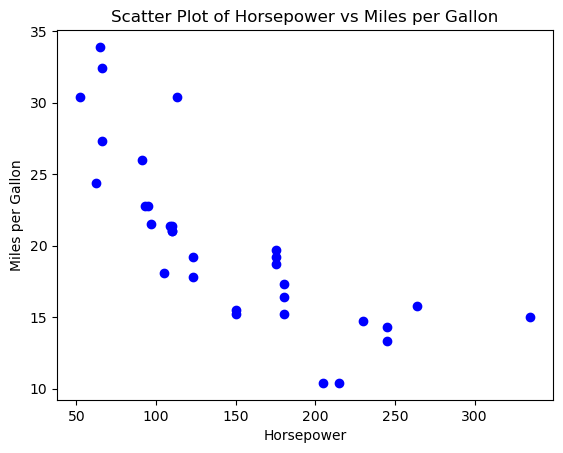

In [37]:
# Plot a scatter plot to visualize the relationship between horsepower and mpg. Add a trend line to the plot.
plt.scatter(df["horsepower"], df["mpg"], color="blue",)
plt.title("Scatter Plot of Horsepower vs Miles per Gallon")
plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon")
plt.show()

In [ ]:
# Fuel Efficiency Analysis: from the scatter plot we can confidently say that the higher the horsepwoer the lower the miles per gallon 

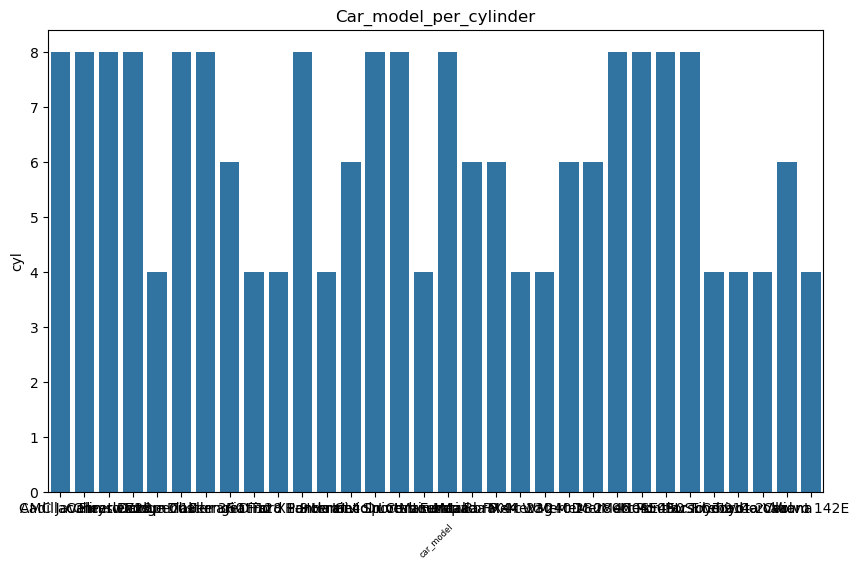

In [47]:
# Group the cars by the number of cylinders (cyl) and calculate the average mpg for each group.
# Visualize this using a bar chart to compare fuel efficiency across different cylinder categories.
car_model_per_cylinder =df.groupby("model")['cyl'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=car_model_per_cylinder,x='model',y='cyl')
plt.title("Car_model_per_cylinder")
plt.xlabel("car_model",fontsize=6,rotation=45)
 
plt.show() 

In [ ]:
High-Performance Cars:

In [ ]:
Create a subset of "high-performance" cars where performance_score > 100. For these cars:
Count the number of cars for each gear category.
Plot a pie chart showing the distribution of gear among  high-performance cars.